### import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from datetime import datetime
from astropy.time import Time
from astropy.io import fits
import matplotlib.patches as patches
import csv

In [4]:
def getT21Values(compName):
    """
    get light curve info from digitised T21 plot
    """
    light_curve = []
    light_curve_err = []
    mjd_array = []
    
    with open('{}Light.csv'.format(compName)) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            mjd = float(row[0])
            light = float(row[1])
            mjd_array.append(mjd)
            light_curve.append(light)
            light_curve_err.append(0.1*light)
            
    return np.array(light_curve), np.array(light_curve_err), np.array(mjd_array)

def getYear(epoch):
    """
    returns the decimal year for the epoch
    """
    hdu = fits.open('../diagram/epoch{}.fits'.format(epoch))
    utc = hdu[0].header['DATE-OBS']
    astropy_time_object = Time(datetime.strptime(utc,'%Y-%m-%d'), format='datetime')
    
    return astropy_time_object.decimalyear

def getNoise(data):
    """
    get the noise in the image
    """
    tmp = np.copy(data)
    tmp[np.abs(tmp) > 3*np.std(tmp)] = 0
    tmp[np.abs(tmp) > 3*np.std(tmp)] = 0
    return np.std(tmp)


def getBO04Values(compName):
    
    epoch_list = [1, 2, 3, 4, 5, 6, 9, 12]
    light_array = []
    year_array = []
    light_err_array = []
    
    
    for epoch in epoch_list:
    
        modelFile = '../properMotion/epoch{}modelfitLabledV2.mod'.format(epoch)
        f = open(modelFile, 'r')
        for line in f:
        
            if line[0] == '!':
                continue
                

            parms = line.split()
            local_compName = parms[-1]
                    
            if local_compName == compName:
                
                light = parms[0]
            
                if light[-1] == 'v':
                    light = light[:-1]
                    
                light = float(light)
                    
                year = getYear(epoch)
                year_array.append(year)
                light_array.append(light)
                
                amp_err = 0.1*light
                
                ## get noise
                hdu = fits.open('../diagram/epoch{}.fits'.format(epoch))
                data = hdu[0].data[0,0,:,:]
                imgNoise = getNoise(data)
                
                
                light_err = np.sqrt(imgNoise**2 + amp_err**2)
                                
                light_err_array.append(light_err)
        

    return np.array(light_array), np.array(light_err_array), np.array(year_array)


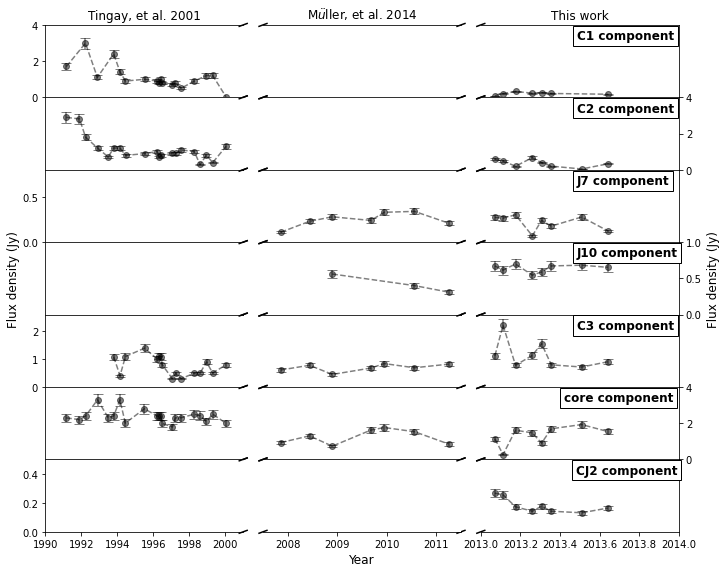

In [12]:
f, ax = plt.subplots(7, 3, sharey=False, figsize=(10,8))
hfont = {'fontname':'Helvetica', 'size':12}

ax1 = ax[0][0]
ax2 = ax[0][1]
ax3 = ax[0][2]
compName = 'C1'
color = 'black'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
ax1.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax1.scatter(mjd_array, light_curve, color=color, alpha=0.5)
ax1.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')

# compName = 'J3'
# light_curve, light_curve_err, mjd_array = getT21Values(compName)
# ax2.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
# ax2.scatter(mjd_array, light_curve, color=color, alpha=0.5)
# ax2.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')

compName = 'c1'
light_array, light_err_array, year_array = getBO04Values(compName)
ax3.errorbar(year_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5)
ax3.scatter(year_array, light_array, color=color, alpha=0.5)
ax3.plot(year_array, light_array, color=color, alpha=0.5, linestyle='dashed')

ax1.set_ylim(0, 4)
ax2.set_ylim(0, 4)
ax3.set_ylim(0, 4)

ax1.set_xlim(1990, 2001)  # outliers only
ax2.set_xlim(2007.5, 2011.5)

ax3.set_xlim(2013, 2014)  # most of the data
ax3.yaxis.tick_right()

ax2.set_yticks([])

ax1.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)


d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax2.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax3.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

#########################################################################################


(ax1, ax2, ax3) = ax[1][:]
compName = 'C2'
color = 'black'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
ax1.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax1.scatter(mjd_array, light_curve, color=color, alpha=0.5)
ax1.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')
compName = 'c2'
light_array, light_err_array, year_array = getBO04Values(compName)
ax3.errorbar(year_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5)
ax3.scatter(year_array, light_array, color=color, alpha=0.5)
ax3.plot(year_array, light_array, color=color, alpha=0.5, linestyle='dashed')

ax1.set_ylim(0, 4)
ax2.set_ylim(0, 4)
ax3.set_ylim(0, 4)

ax1.set_xlim(1990, 2001)  # outliers only
ax2.set_xlim(2007.5, 2011.5)

ax3.set_xlim(2013, 2014)  # most of the data
ax3.yaxis.tick_right()

ax2.set_yticks([])

ax1.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)


d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax2.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

##############################################################################

(ax1, ax2, ax3) = ax[2][:]
compName = 'J7'
color = 'black'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
ax2.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax2.scatter(mjd_array, light_curve, color=color, alpha=0.5)
ax2.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')
compName = 'c3'
light_array, light_err_array, year_array = getBO04Values(compName)
ax3.errorbar(year_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5)
ax3.scatter(year_array, light_array, color=color, alpha=0.5)
ax3.plot(year_array, light_array, color=color, alpha=0.5, linestyle='dashed')

ax1.set_ylim(0, 0.8)
ax2.set_ylim(0, 0.8)
ax3.set_ylim(0, 0.8)

ax1.set_xlim(1990, 2001)  # outliers only
ax2.set_xlim(2007.5, 2011.5)

ax3.set_xlim(2013, 2014)  # most of the data
ax3.yaxis.tick_right()

ax2.set_yticks([])

ax1.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)


d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax2.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax3.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

#########################################################################################################


(ax1, ax2, ax3) = ax[3][:]
compName = 'J10'
color = 'black'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
ax2.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax2.scatter(mjd_array, light_curve, color=color, alpha=0.5)
ax2.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')

compName = 'c4'
light_array, light_err_array, year_array = getBO04Values(compName)
ax3.errorbar(year_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5)
ax3.scatter(year_array, light_array, color=color, alpha=0.5)
ax3.plot(year_array, light_array, color=color, alpha=0.5, linestyle='dashed')


ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
ax3.set_ylim(0, 1)

ax1.set_xlim(1990, 2001)  # outliers only
ax2.set_xlim(2007.5, 2011.5)

ax3.set_xlim(2013, 2014)  # most of the data
ax3.yaxis.tick_right()

ax2.set_yticks([])

ax1.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)


#ax1.set_ylabel('Flux density (Jy)', position=(5, 0.5), **hfont)

#ax3.set_ylabel('Flux density (Jy)')



d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax2.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

########################################################################################################

(ax1, ax2, ax3) = ax[4][:]
compName = 'C3'
color = 'black'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
ax1.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax1.scatter(mjd_array, light_curve, color=color, alpha=0.5)
ax1.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')

compName = 'Jstat'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
ax2.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax2.scatter(mjd_array, light_curve, color=color, alpha=0.5)
ax2.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')

compName = 'c5'
light_array, light_err_array, year_array = getBO04Values(compName)
ax3.errorbar(year_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5)
ax3.scatter(year_array, light_array, color=color, alpha=0.5)
ax3.plot(year_array, light_array, color=color, alpha=0.5, linestyle='dashed')

ax1.set_ylim(0, 2.6)
ax2.set_ylim(0, 2.6)
ax3.set_ylim(0, 2.6)

ax1.set_xlim(1990, 2001)  # outliers only
ax2.set_xlim(2007.5, 2011.5)

ax3.set_xlim(2013, 2014)  # most of the data
ax3.yaxis.tick_right()

ax2.set_yticks([])

ax1.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)


d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax2.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax3.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

#######################################################################################################


(ax1, ax2, ax3) = ax[5][:]
compName = 'core'
color = 'black'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
ax1.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax1.scatter(mjd_array, light_curve, color=color, alpha=0.5)
ax1.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')


compName = 'Tcore'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
ax2.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax2.scatter(mjd_array, light_curve, color=color, alpha=0.5)
ax2.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')


compName = 'core'
light_array, light_err_array, year_array = getBO04Values(compName)
ax3.errorbar(year_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5)
ax3.scatter(year_array, light_array, color=color, alpha=0.5)
ax3.plot(year_array, light_array, color=color, alpha=0.5, linestyle='dashed')

ax1.set_ylim(0, 4)
ax2.set_ylim(0, 4)
ax3.set_ylim(0, 4)

ax1.set_xlim(1990, 2001)  # outliers only
ax2.set_xlim(2007.5, 2011.5)

ax3.set_xlim(2013, 2014)  # most of the data
ax3.yaxis.tick_right()

ax2.set_yticks([])

ax1.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)


d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax2.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

###################################################################################

(ax1, ax2, ax3) = ax[6][:]
# compName = 'core'
# color = 'black'
# light_curve, light_curve_err, mjd_array = getT21Values(compName)
# ax1.errorbar(mjd_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
# ax1.scatter(mjd_array, light_curve, color=color, alpha=0.5)
# ax1.plot(mjd_array, light_curve, color=color, alpha=0.5, linestyle='dashed')
compName = 'cj2'
light_array, light_err_array, year_array = getBO04Values(compName)
ax3.errorbar(year_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5)
ax3.scatter(year_array, light_array, color=color, alpha=0.5)
ax3.plot(year_array, light_array, color=color, alpha=0.5, linestyle='dashed')

ax1.set_ylim(0, 0.5)
ax2.set_ylim(0, 0.5)
ax3.set_ylim(0, 0.5)

ax1.set_xlim(1990, 2001)  # outliers only
ax2.set_xlim(2007.5, 2011.5)

ax3.set_xlim(2013, 2014)  # most of the data
ax3.yaxis.tick_right()

ax2.set_yticks([])

ax1.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)


d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax2.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes, color='k', clip_on=False)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax3.set_yticks([])

ax[3][0].set_ylabel('Flux density (Jy)', labelpad=25, **hfont)
ax[3][2].set_ylabel('Flux density (Jy)', labelpad=5, **hfont)
ax[3][2].yaxis.set_label_position('right')
ax[6][1].set_xlabel('Year', **hfont)



ax[6][2].annotate('CJ2 component', (0.48, 0.8), xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='square', facecolor='white'))

ax[5][2].annotate('core component', (0.42, 0.8), xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='square', facecolor='white'))

ax[4][2].annotate('C3 component', (0.485, 0.8), xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='square', facecolor='white'))

ax[3][2].annotate('J10 component', (0.485, 0.8), xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='square', facecolor='white'))

ax[2][2].annotate('J7 component', (0.485, 0.8), xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='square', facecolor='white'))

ax[1][2].annotate('C2 component', (0.485, 0.8), xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='square', facecolor='white'))

ax[0][2].annotate('C1 component', (0.485, 0.8), xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='square', facecolor='white'))


ax[0][0].set_title('Tingay, et al. 2001', **hfont)
ax[0][1].set_title(r'M$\ddot{u}$ller, et al. 2014', **hfont)
ax[0][2].set_title('This work', **hfont)

plt.subplots_adjust(left=0.06,
                    bottom=0.07,
                    right=0.94,
                    top=0.95,
                    wspace=0.1,
                    hspace=0)


plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig('light.png', dpi=300)

### plot light vs distance

In [22]:
### store fit values for different components
c1_alpha, c1_beta  = 13.447126123475815, 1.7773544354323334
c2_alpha, c2_beta  = 1.533112216716652, 1.6216444223829862
J7_alpha, J7_beta  = -22.203350711057137, 1.8375295513335037
J10_alpha, J10_beta = -52.42245459109116, 2.8056974835583053

In [23]:
def getDistance(alpha, beta, utc_array):
    dist_array = alpha -1990*beta + utc_array*beta
    return dist_array
    

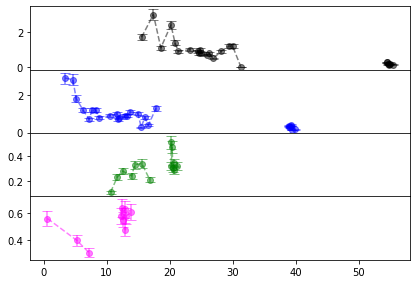

In [45]:
f, ax = plt.subplots(4, 1, sharex=True, figsize=(6,4))
plt.subplots_adjust(left=0.06,
                    bottom=0.07,
                    right=0.94,
                    top=0.95,
                    wspace=0.1,
                    hspace=0)

##################c1############################
compName = 'C1'
color = 'black'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
dist_array = getDistance(c1_alpha, c1_beta, mjd_array)

ax[0].errorbar(dist_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax[0].scatter(dist_array, light_curve, color=color, alpha=0.5)
ax[0].plot(dist_array, light_curve, color=color, alpha=0.5, linestyle='dashed')

compName = 'c1'
light_array, light_err_array, year_array = getBO04Values(compName)
dist_array = getDistance(c1_alpha, c1_beta, year_array)
ax[0].errorbar(dist_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5, label='C1')
ax[0].scatter(dist_array, light_array, color=color, alpha=0.5)
ax[0].plot(dist_array, light_array, color=color, alpha=0.5, linestyle='dashed')

##################c2############################

compName = 'C2'
color = 'blue'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
dist_array = getDistance(c2_alpha, c2_beta, mjd_array)

ax[1].errorbar(dist_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax[1].scatter(dist_array, light_curve, color=color, alpha=0.5)
ax[1].plot(dist_array, light_curve, color=color, alpha=0.5, linestyle='dashed')

compName = 'c2'
light_array, light_err_array, year_array = getBO04Values(compName)
dist_array = getDistance(c2_alpha, c2_beta, year_array)
ax[1].errorbar(dist_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5, label='C2')
ax[1].scatter(dist_array, light_array, color=color, alpha=0.5)
ax[1].plot(dist_array, light_array, color=color, alpha=0.5, linestyle='dashed')

########################### c3

compName = 'J7'
color = 'green'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
dist_array = getDistance(J7_alpha, J7_beta, mjd_array)

ax[2].errorbar(dist_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax[2].scatter(dist_array, light_curve, color=color, alpha=0.5)
ax[2].plot(dist_array, light_curve, color=color, alpha=0.5, linestyle='dashed')

compName = 'c3'
light_array, light_err_array, year_array = getBO04Values(compName)
dist_array = getDistance(J7_alpha, J7_beta, year_array)
ax[2].errorbar(dist_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5, label='C2')
ax[2].scatter(dist_array, light_array, color=color, alpha=0.5)
ax[2].plot(dist_array, light_array, color=color, alpha=0.5, linestyle='dashed')


########################### c4

compName = 'J10'
color = 'magenta'
light_curve, light_curve_err, mjd_array = getT21Values(compName)
dist_array = getDistance(J10_alpha, J10_beta, mjd_array)

ax[3].errorbar(dist_array, light_curve, yerr=light_curve_err, fmt=' ', capsize=5, color=color, alpha=0.5)
ax[3].scatter(dist_array, light_curve, color=color, alpha=0.5)
ax[3].plot(dist_array, light_curve, color=color, alpha=0.5, linestyle='dashed')

compName = 'c4'
light_array, light_err_array, year_array = getBO04Values(compName)
dist_array = getDistance(J10_alpha, J10_beta, year_array)
ax[3].errorbar(dist_array, light_array, yerr=light_err_array, fmt=' ', capsize=5, color=color, alpha=0.5, label='C2')
ax[3].scatter(dist_array, light_array, color=color, alpha=0.5)
ax[3].plot(dist_array, light_array, color=color, alpha=0.5, linestyle='dashed')




#plt.yscale('log')



array([1.72025806, 3.02022581, 1.11425806, 2.424     , 1.41725806,
       0.909     , 1.00674194, 0.909     , 0.81125806, 1.00674194,
       0.80148387, 0.70374194, 0.81125806, 0.50825806, 0.909     ,
       1.212     , 1.22177419, 0.02932258])